In [ ]:
# !pip install numpy pandas matplotlib seaborn tqdm openpyxl missingno

# Library

In [1]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm

# visualization
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'.venv/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
text_data_org = pd.read_excel('./data/비식별된 해외기업별 영문 텍스트데이터.xlsx')
statistics_data_org = pd.read_excel('./data/통계청 국제표준산업분류 HSCODE 6단위 매핑.xlsx')
customs_data_org = pd.read_excel('./data/관세청_HS부호_240101.xlsx')

text_data = text_data_org.copy()
statistics_data = statistics_data_org.copy()
customs_data = customs_data_org.copy()

In [3]:
display(text_data.head())
display(statistics_data.head())
display(customs_data.head())

,ID,CODE,DSC
0,1,4520,"automotive repair shops, nec specialized auto..."
1,2,149,"general farms, primarily animals, nsk derives..."
2,3,4630,fish and seafoods the wholesale distribution ...
3,4,4510,"new and used car dealers, nsk manufactures a ..."
4,4,2930,"automotive stampings, nsk manufacturing autom..."


,"ISIC4\n(국제표준산업분류, UN)",ISIC4 분류명(한글),KSIC10\n한국표준산업분류,KSIC10 분류명,"HS2017\n관세·통계통합품목분류(WCO, 한국)",HS2017 분류명(한글)
0,111.0,"곡물(쌀 제외), 콩류, 종실유 재배업",01123,종자 및 묘목 생산업,100111.0,종자
1,NaN,NaN,NaN,NaN,100191.0,종자
2,111.0,"곡물(쌀 제외), 콩류, 종실유 재배업",01110,곡물 및 기타 식량작물 재배업,100119.0,기타
3,NaN,NaN,NaN,NaN,100199.0,기타
4,111.0,"곡물(쌀 제외), 콩류, 종실유 재배업",01123,종자 및 묘목 생산업,100510.0,종자용


,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명
0,101211000,농가 사육용,For farm breeding,11020101.0,(말)
1,101219000,기타,Other,11020101.0,(말)
2,101291000,경주말,Horses for racing,11020101.0,(말)
3,101299000,기타,Other,11020101.0,(말)
4,101300000,당나귀,Asses,11020190.0,(기타 산 동물)


# 비식별된 해외기업별 영문 텍스트데이터

In [4]:
text_data.shape

(10000, 3)

In [5]:
text_data.columns

Index(['ID', 'CODE', 'DSC'], dtype='object')

In [6]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10000 non-null  int64 
 1   CODE    10000 non-null  int64 
 2   DSC     10000 non-null  object
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


## 기업 ID

In [7]:
text_data['ID'].value_counts()

ID
52       3
1944     3
3068     3
1952     2
9412     2
        ..
3456     1
3457     1
3458     1
3459     1
10645    1
Name: count, Length: 9897, dtype: int64

In [8]:
text_data['ID'].unique()

array([    1,     2,     3, ..., 10643, 10644, 10645], dtype=int64)

In [9]:
text_data['ID'] = text_data['ID'].astype(str)

In [10]:
text_data['ID'].unique()

array(['1', '2', '3', ..., '10643', '10644', '10645'], dtype=object)

## 국제표준산업분류코드 (ISIC 4자리)

In [11]:
text_data['CODE'].value_counts()

CODE
4659    899
4649    886
4530    497
4663    369
4669    298
       ... 
9311      1
170       1
1623      1
8521      1
7210      1
Name: count, Length: 273, dtype: int64

In [12]:
text_data['CODE'].unique()

array([4520,  149, 4630, 4510, 2930, 4759, 4659, 2599, 3230, 2818, 4530,
       4669, 4652, 4771, 1010,  146, 4690, 5610, 8411, 2910, 2651, 3250,
       2100, 2593, 6311, 2219, 6202, 3030, 2811, 2819, 2021, 4663, 1701,
       1079,  910, 1920, 4620, 4649, 2620, 2029, 6820, 2610, 5110, 4752,
       1312, 2220, 1410, 2395, 2822, 2011, 2432, 4662, 2410, 8299, 2813,
       1399, 4641, 1311, 2012, 5223, 1392, 3011, 1313, 1393, 7020, 4653,
       1073, 4322, 2511, 2670, 9529, 1030, 2710, 4651, 9999, 6492, 2750,
       9412, 2920, 7110, 2310, 1430, 1391, 2823, 1050, 3100, 1511, 1071,
       1702, 4661, 2023, 2630, 4312, 2815, 3211, 1623, 2824, 1629, 2420,
       2825, 1811, 1394, 8690, 2022, 2592, 1061, 2740, 2431, 4100, 1040,
       2826,  170, 2821, 2790,  130, 2591, 4390, 2013, 2399, 3290, 4763,
       4540, 9311, 4210, 1512, 4773, 1709, 9411, 7500, 2520, 4321, 2829,
       9522, 1520, 3510, 2391, 5229, 2512, 4741,  113, 4220, 1812, 2720,
       5813, 1104, 1062, 8130, 2640, 8010, 2394,  8

In [13]:
print(text_data['CODE'].max(), text_data['CODE'].min())

9999 111


- 세 자리는 네 자리로 바꿔줘야 함

In [14]:
text_data['CODE'] = text_data['CODE'].apply(lambda x: f'{x:04}')

In [15]:
text_data['CODE'].unique()

array(['4520', '0149', '4630', '4510', '2930', '4759', '4659', '2599',
       '3230', '2818', '4530', '4669', '4652', '4771', '1010', '0146',
       '4690', '5610', '8411', '2910', '2651', '3250', '2100', '2593',
       '6311', '2219', '6202', '3030', '2811', '2819', '2021', '4663',
       '1701', '1079', '0910', '1920', '4620', '4649', '2620', '2029',
       '6820', '2610', '5110', '4752', '1312', '2220', '1410', '2395',
       '2822', '2011', '2432', '4662', '2410', '8299', '2813', '1399',
       '4641', '1311', '2012', '5223', '1392', '3011', '1313', '1393',
       '7020', '4653', '1073', '4322', '2511', '2670', '9529', '1030',
       '2710', '4651', '9999', '6492', '2750', '9412', '2920', '7110',
       '2310', '1430', '1391', '2823', '1050', '3100', '1511', '1071',
       '1702', '4661', '2023', '2630', '4312', '2815', '3211', '1623',
       '2824', '1629', '2420', '2825', '1811', '1394', '8690', '2022',
       '2592', '1061', '2740', '2431', '4100', '1040', '2826', '0170',
      

## 기업 관련 텍스트 데이터

In [16]:
text_data['DSC'].value_counts()

DSC
commercial equipment, nec  the wholesale distribution of commercial and related machines and equipment, not elsewhere classified, such as commercial cooking and food service equipment; partitions, shelving, lockers, and store fixtures; electrical signs; and balances and scales, except laboratory. professional and commercial equipment wholesale commercial equipment, nec other commercial equipment merchant wholesalers wholesale of other office machinery and equipment wholesale of other machinery and equipment wholesale of other machinery and equipmentother machinery and equipment wholesaling not elsewhere classified                                                                        339
motor vehicle supplies and new parts  the wholesale distribution of motor vehicle supplies, accessories, tools, and equipment; and new motor vehicle parts. motor vehicle wholesale motor vehicle supplies and new parts motor vehicle supplies and new parts merchant wholesalers wholesale trade of motor

In [17]:
for idx in range(0, text_data.shape[0]):
    text = text_data.iloc[idx, 2]
    search = re.search(r'\bNone\b', text) # nan, Nan, NaN, Null, None
    if search:
        print(idx, search.group())

In [18]:
# description 텍스트 길이 확인
text_data_DSC_cnt = text_data['DSC'].apply(lambda x: len(x.split()))
text_data_DSC_cnt.describe()

count    10000.000000
mean        65.877800
std         20.470124
min         17.000000
25%         53.000000
50%         64.000000
75%         77.000000
max        222.000000
Name: DSC, dtype: float64

In [19]:
# text_data_DSC_cnt[text_data_DSC_cnt == 17]
text_data.iloc[188, 2]

'hardware, nec nonclassifiable establishments nonclassifiable establishments hardware, nec nonclassifiable establishments nonclassifiable establishments nonclassifiable establishments nonclassifiable establishmentsnonclassifiable establishments'

- 비어있는 description은 없음
- 텍스트 요약으로 비숫한 직군을 나타내는 컬럼 추가가 가능할까?
- 어떤 텍스트 요약 모델 쓸지도 생각해봐야 할 듯
- 아님 아예 GPT API로 비슷한 직군 레이블링 요청해도 괜찮을 듯
- 이 과정은 직접 검수 필요

# 통계청 국제표준산업분류 HSCODE 6단위 매핑

In [20]:
customs_data.columns

Index(['HS부호', '한글품목명', '영문품목명', '성질통합분류코드', '성질통합분류코드명'], dtype='object')

In [21]:
customs_data.shape

(12422, 5)

In [22]:
customs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12422 entries, 0 to 12421
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HS부호       12422 non-null  int64  
 1   한글품목명      12422 non-null  object 
 2   영문품목명      12422 non-null  object 
 3   성질통합분류코드   11294 non-null  float64
 4   성질통합분류코드명  11294 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 485.4+ KB


## 결측치 시각화

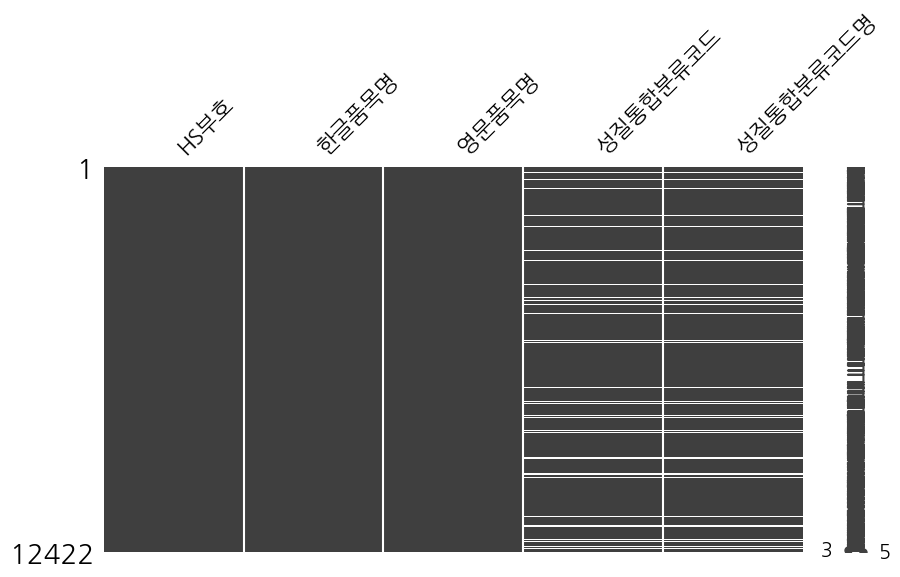

In [23]:
msno.matrix(customs_data)
plt.gcf().set_size_inches(10, 5)
plt.show()

## HS부호

In [24]:
customs_data['HS부호'].value_counts()

HS부호
101211000     1
73170010      1
7313001000    1
7313009000    1
7314120000    1
             ..
3201200000    1
3201900000    1
3202101000    1
3202103000    1
9706903000    1
Name: count, Length: 12422, dtype: int64

In [25]:
customs_data['HS부호'].unique()

array([ 101211000,  101219000,  101291000, ..., 9706901000, 9706902000,
       9706903000], dtype=int64)

In [26]:
customs_data[customs_data['HS부호'].isnull()]

,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명


In [27]:
customs_data[customs_data['HS부호'] == ''] # ' '

,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명


In [28]:
print(customs_data['HS부호'].max(), customs_data['HS부호'].min())

9706903000 207603


- 열자리로 바꿔줘야 함
- int to str

In [29]:
# def zero_input(x):
#     if pd.isna(x):
#         return np.nan
#     elif len(x) == 6:
#         return '0000' + x
#     elif len(x) == 7:
#         return '000' + x
#     elif len(x) == 8:
#         return '00' + x
#     elif len(x) == 9:
#         return '0' + x
#     else:
#         return x

def zero_input(x):
    if pd.isna(x):
        return np.nan
    else:
        cnt = 10 - len(x)
        return '0' * cnt + x

customs_data['HS부호'] = customs_data['HS부호'].astype(str)
customs_data['HS부호'] = customs_data['HS부호'].apply(lambda x: zero_input(x))

In [30]:
customs_data['HS부호'].value_counts()

HS부호
0101211000    1
0073170010    1
7313001000    1
7313009000    1
7314120000    1
             ..
3201200000    1
3201900000    1
3202101000    1
3202103000    1
9706903000    1
Name: count, Length: 12422, dtype: int64

In [31]:
customs_data['HS부호'].unique()

array(['0101211000', '0101219000', '0101291000', ..., '9706901000',
       '9706902000', '9706903000'], dtype=object)

## 한글품목명

In [32]:
customs_data['한글품목명'].value_counts()

한글품목명
기타                        3105
그 밖의 방직용 섬유로 만든 것           59
면으로 만든 것                    58
합성섬유로 만든 것                  58
항공기용                        56
                          ... 
페니실린 지(G) 나트륨                1
페니실린 지(G) 칼륨                 1
히드록시프로필 슈크로오스                1
당에테르ㆍ당아세탈ㆍ당에스테르와 이들의 염       1
자작나무[베툴라(Betula)속]의 것        1
Name: count, Length: 6179, dtype: int64

In [33]:
customs_data['한글품목명'].unique()

array(['농가 사육용', '기타', '경주말', ..., '제작 후 100년을 초과한 것', '도자기류', '악기류'],
      dtype=object)

In [34]:
customs_data[customs_data['한글품목명'].isnull()]

,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명


In [35]:
customs_data[customs_data['한글품목명'] == ''] # ' '

,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명


## 영문품목명

In [36]:
customs_data['영문품목명'].value_counts()

영문품목명
Other                                                                                                                      3102
Of other textile materials                                                                                                   61
Of synthetic fibres                                                                                                          59
Material for manufacturing agricultural chemicals (registered material under the Agricultural Chemicals Management Act)      59
Of cotton                                                                                                                    58
                                                                                                                           ... 
Heparin and its salts                                                                                                         1
Bear's gall                                                                                       

In [37]:
customs_data['영문품목명'].unique()

array(['For farm breeding', 'Other', 'Horses for racing', ...,
       'Of an age exceeding 100 years', 'Ceramics', 'Musical instruments'],
      dtype=object)

In [38]:
customs_data[customs_data['영문품목명'].isnull()]

,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명


In [39]:
customs_data[customs_data['영문품목명'] == ''] # ' '

,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명


## 성질통합분류코드

In [40]:
customs_data['성질통합분류코드'].value_counts()

성질통합분류코드
25030201.0    629
25030101.0    335
23030401.0    189
25900101.0    176
24010201.0    175
             ... 
11030212.0      1
11030207.0      1
13050102.0      1
13050201.0      1
11010106.0      1
Name: count, Length: 758, dtype: int64

In [41]:
customs_data['성질통합분류코드'].unique()

array([11020101., 11020190., 11020102.,       nan, 11020103., 11020104.,
       11020105., 11020106., 11020201., 11020202., 11020290., 11020301.,
       11020302., 11020390., 11020203., 11020303., 11020204., 11020304.,
       11030190., 11030105., 11030108., 11030101., 11030106., 11030103.,
       11030107., 11030104., 11030109., 11030202., 11030290., 11030203.,
       11030201., 11030205., 11030209., 11030208., 11030204., 11030207.,
       11030212., 11030211., 11030206., 11032301., 11030213., 11030302.,
       11030390., 11030313., 11030311., 11030303., 11030301., 11030305.,
       11030310., 11030309., 11030304., 11030307., 11030306., 11030308.,
       11030312., 11030314., 11030315., 11030490., 11030402., 11030403.,
       11030401., 11030590., 11030504., 11030505., 11030502., 11030503.,
       11030501., 11032201., 11032202., 11032203., 11030790., 11030890.,
       11030601., 11030690., 11030602., 11030701., 11030703., 11030702.,
       11030704., 11030801., 11030802., 11030803., 

In [42]:
customs_data[customs_data['성질통합분류코드'].isnull()]

,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명
17,0001029090,기타,Other,NaN,NaN
37,0001059910,오리,Ducks,NaN,NaN
51,0001061950,여우,Fox,NaN,NaN
54,0001061960,밍크,Mink,NaN,NaN
69,0001069030,환형동물류,Annelida,NaN,NaN
...,...,...,...,...,...
12305,0096019090,기타,Other,NaN,NaN
12309,0096020090,기타,Other,NaN,NaN
12377,0096190010,제지용 펄프ㆍ종이ㆍ셀룰로오스워딩(cellulose wadding)ㆍ셀룰로오스섬유의 ...,"Of paper pulp, paper, cellulose wadding or web...",NaN,NaN
12381,0096190030,그 밖의 방직용 섬유재료로 만든 것,Of other textile materials,NaN,NaN


In [43]:
print(customs_data['성질통합분류코드'].max(), customs_data['성질통합분류코드'].min())

34900101.0 11010101.0


- int to str

In [44]:
customs_data['성질통합분류코드'] = customs_data['성질통합분류코드'].astype(str)
customs_data['성질통합분류코드'] = customs_data['성질통합분류코드'].replace('nan', np.nan)
customs_data['성질통합분류코드'] = customs_data['성질통합분류코드'].str.replace('.0', '', regex=False)

In [45]:
customs_data['성질통합분류코드'].value_counts()

성질통합분류코드
25030201    629
25030101    335
23030401    189
25900101    176
24010201    175
           ... 
11030212      1
11030207      1
13050102      1
13050201      1
11010106      1
Name: count, Length: 758, dtype: int64

In [46]:
customs_data['성질통합분류코드'].unique()

array(['11020101', '11020190', '11020102', nan, '11020103', '11020104',
       '11020105', '11020106', '11020201', '11020202', '11020290',
       '11020301', '11020302', '11020390', '11020203', '11020303',
       '11020204', '11020304', '11030190', '11030105', '11030108',
       '11030101', '11030106', '11030103', '11030107', '11030104',
       '11030109', '11030202', '11030290', '11030203', '11030201',
       '11030205', '11030209', '11030208', '11030204', '11030207',
       '11030212', '11030211', '11030206', '11032301', '11030213',
       '11030302', '11030390', '11030313', '11030311', '11030303',
       '11030301', '11030305', '11030310', '11030309', '11030304',
       '11030307', '11030306', '11030308', '11030312', '11030314',
       '11030315', '11030490', '11030402', '11030403', '11030401',
       '11030590', '11030504', '11030505', '11030502', '11030503',
       '11030501', '11032201', '11032202', '11032203', '11030790',
       '11030890', '11030601', '11030690', '11030602', '1

## 성질통합분류코드명

In [47]:
customs_data['성질통합분류코드명'].value_counts()

성질통합분류코드명
(유기화합물)           629
(무기화합물)           335
(유리 및 유리제품)       189
(기타 화학공업제품)       176
(철강 판재)           175
                 ... 
(잉어(신선 또는 냉장))      1
(명태(신선 또는 냉장))      1
(기초화장품)             1
(샴푸)                1
(팥)                 1
Name: count, Length: 758, dtype: int64

In [48]:
customs_data['성질통합분류코드명'].unique()

array(['(말)', '(기타 산 동물)', '(소)', nan, '(돼지)', '(닭)', '(칠면조)', '(오리)',
       '(소고기)', '(돼지고기)', '(기타 육류)', '(소 설육)', '(돼지 설육)', '(기타 설육)',
       '(닭고기)', '(닭 설육)', '(오리고기)', '(오리 설육)', '(기타 어류(활어))', '(뱀장어(활어))',
       '(잉어(활어))', '(참치(활어))', '(먹장어(활어))', '(넙치류(활어))', '(미꾸라지(활어))',
       '(붕어(활어))', '(민어(활어))', '(연어(신선 또는 냉장))', '(기타 어류(신선 또는 냉장))',
       '(가자미(신선 또는 냉장))', '(참치(신선 또는 냉장))', '(고등어(신선 또는 냉장))',
       '(삼치(신선 또는 냉장))', '(꽁치(신선 또는 냉장))', '(대구(신선 또는 냉장))',
       '(명태(신선 또는 냉장))', '(잉어(신선 또는 냉장))', '(뱀장어(신선 또는 냉장))',
       '(갈치(신선 또는 냉장))', '(수산물 부산물)', '(어란(신선 또는 냉장))', '(연어(냉동))',
       '(기타 어류(냉동))', '(잉어(냉동))', '(뱀장어(냉동))', '(가자미(냉동))', '(참치(냉동))',
       '(고등어(냉동))', '(삼치(냉동))', '(꽁치(냉동))', '(대구(냉동))', '(명태(냉동))',
       '(갈치(냉동))', '(조기(냉동))', '(먹장어(냉동))', '(민어(냉동))', '(어란(냉동))',
       '(기타 어류의 어육(신선 또는 냉장))', '(연어 어육(신선 또는 냉장))', '(가자미 어육(신선 또는 냉장))',
       '(참치 어육(신선 또는 냉장))', '(기타 어류의 어육(냉동))', '(대구 어육(냉동))',
       '(명태 어육(냉동))', '(연어 어육(냉동))', '(가자미 어육

In [49]:
customs_data[customs_data['성질통합분류코드명'].isnull()]

,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명
17,0001029090,기타,Other,NaN,NaN
37,0001059910,오리,Ducks,NaN,NaN
51,0001061950,여우,Fox,NaN,NaN
54,0001061960,밍크,Mink,NaN,NaN
69,0001069030,환형동물류,Annelida,NaN,NaN
...,...,...,...,...,...
12305,0096019090,기타,Other,NaN,NaN
12309,0096020090,기타,Other,NaN,NaN
12377,0096190010,제지용 펄프ㆍ종이ㆍ셀룰로오스워딩(cellulose wadding)ㆍ셀룰로오스섬유의 ...,"Of paper pulp, paper, cellulose wadding or web...",NaN,NaN
12381,0096190030,그 밖의 방직용 섬유재료로 만든 것,Of other textile materials,NaN,NaN


- 괄호 보기 불편하니까 없애기

In [50]:
text = '(디젤 2,000cc초과 승용차(2,500cc이하) - 중고차)'
res = re.sub(r'^\((.*?)\)$', r'\1', text)
print(res)

디젤 2,000cc초과 승용차(2,500cc이하) - 중고차


In [51]:
def re_sub(x):
    if pd.isna(x):
        return np.nan
    else:
        return re.sub(r'^\((.*?)\)$', r'\1', x)

customs_data['성질통합분류코드명'] = customs_data['성질통합분류코드명'].apply(lambda x: re_sub(x))

In [52]:
customs_data['성질통합분류코드명'].value_counts()

성질통합분류코드명
유기화합물           629
무기화합물           335
유리 및 유리제품       189
기타 화학공업제품       176
철강 판재           175
               ... 
잉어(신선 또는 냉장)      1
명태(신선 또는 냉장)      1
기초화장품             1
샴푸                1
팥                 1
Name: count, Length: 758, dtype: int64

In [53]:
customs_data['성질통합분류코드명'].unique()

array(['말', '기타 산 동물', '소', nan, '돼지', '닭', '칠면조', '오리', '소고기', '돼지고기',
       '기타 육류', '소 설육', '돼지 설육', '기타 설육', '닭고기', '닭 설육', '오리고기', '오리 설육',
       '기타 어류(활어)', '뱀장어(활어)', '잉어(활어)', '참치(활어)', '먹장어(활어)', '넙치류(활어)',
       '미꾸라지(활어)', '붕어(활어)', '민어(활어)', '연어(신선 또는 냉장)', '기타 어류(신선 또는 냉장)',
       '가자미(신선 또는 냉장)', '참치(신선 또는 냉장)', '고등어(신선 또는 냉장)', '삼치(신선 또는 냉장)',
       '꽁치(신선 또는 냉장)', '대구(신선 또는 냉장)', '명태(신선 또는 냉장)', '잉어(신선 또는 냉장)',
       '뱀장어(신선 또는 냉장)', '갈치(신선 또는 냉장)', '수산물 부산물', '어란(신선 또는 냉장)',
       '연어(냉동)', '기타 어류(냉동)', '잉어(냉동)', '뱀장어(냉동)', '가자미(냉동)', '참치(냉동)',
       '고등어(냉동)', '삼치(냉동)', '꽁치(냉동)', '대구(냉동)', '명태(냉동)', '갈치(냉동)',
       '조기(냉동)', '먹장어(냉동)', '민어(냉동)', '어란(냉동)', '기타 어류의 어육(신선 또는 냉장)',
       '연어 어육(신선 또는 냉장)', '가자미 어육(신선 또는 냉장)', '참치 어육(신선 또는 냉장)',
       '기타 어류의 어육(냉동)', '대구 어육(냉동)', '명태 어육(냉동)', '연어 어육(냉동)',
       '가자미 어육(냉동)', '참치 어육(냉동)', '건조어란', '훈제어란', '염장어란', '기타 어류(건조)',
       '기타 어류(염장·염수장)', '연어(훈제)', '기타 어류(훈제)', '명태(훈제)', '대구(건조)',
       '명태(북어)', '멸

- 결측치 존재하는 인덱스 구간 같은지 확인

In [54]:
temp1 = customs_data[customs_data['성질통합분류코드'].isnull()].index.tolist()
temp2 = customs_data[customs_data['성질통합분류코드명'].isnull()].index.tolist()

print(temp1 == temp2)

True


# 관세청 HS 부호

In [55]:
statistics_data.shape

(8519, 6)

In [56]:
statistics_data.columns

Index(['ISIC4\n(국제표준산업분류, UN)', 'ISIC4 분류명(한글)', 'KSIC10\n한국표준산업분류',
       'KSIC10 분류명', 'HS2017\n관세·통계통합품목분류(WCO, 한국)', 'HS2017 분류명(한글)'],
      dtype='object')

In [57]:
statistics_data.columns = ['ISIC4_국제표준산업분류', 
                           'ISIC4_분류명', 
                           'KSIC10_한국표준산업분류',
                           'KSIC10_분류명', 
                           'HS2017_관세통계통합품목분류', 
                           'HS2017_분류명']

In [58]:
statistics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISIC4_국제표준산업분류     2970 non-null   float64
 1   ISIC4_분류명          2963 non-null   object 
 2   KSIC10_한국표준산업분류    3732 non-null   object 
 3   KSIC10_분류명         3729 non-null   object 
 4   HS2017_관세통계통합품목분류  6061 non-null   float64
 5   HS2017_분류명         6061 non-null   object 
dtypes: float64(2), object(4)
memory usage: 399.5+ KB


- Null값 존재함

## 결측치 시각화

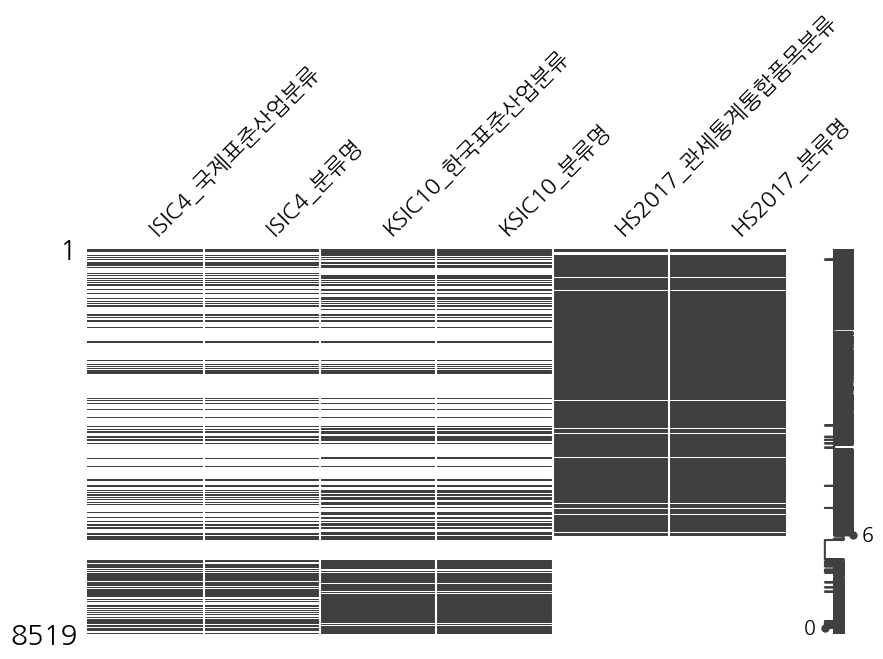

In [59]:
msno.matrix(statistics_data)
plt.gcf().set_size_inches(10, 5)
plt.show()

- ISIC4, KSIC10, HS2017별로 결측치가 같은 구간에 비어있어 보임

## ISIC4_국제표준산업분류

In [60]:
statistics_data['ISIC4_국제표준산업분류'].value_counts()

ISIC4_국제표준산업분류
111.0     54
1010.0    48
2011.0    44
1079.0    44
2410.0    44
          ..
3319.0     1
7320.0     1
9512.0     1
3314.0     1
9900.0     1
Name: count, Length: 374, dtype: int64

In [61]:
statistics_data['ISIC4_국제표준산업분류'].unique()

array([ 111.,   nan,  112.,  113.,  128.,  230.,  122.,  123.,  121.,
        124.,  125.,  126.,  127.,  114.,  129.,  119.,  116.,  130.,
        115.,  141.,  143.,  144.,  149.,  170.,  142.,  145.,  146.,
       1010., 1040.,  210.,  220.,  311.,  312.,  321.,  322.,  510.,
       1920.,  520.,  892.,  610.,  620.,  721.,  710.,  729.,  810.,
        899.,  891.,  893., 1079., 3510., 3520., 3530., 3600., 1075.,
       1020., 1030., 1062., 1050., 1061., 1080., 1071., 1072., 1073.,
       1074., 1101., 2011., 1102., 1103., 1104., 1200., 1311., 1312.,
       1392., 1393., 1394., 1399., 1709., 1391., 1430., 1410., 2220.,
       1511., 1420., 1512., 1520., 3230., 1629., 2219., 1610., 1621.,
       1622., 1623., 1701., 1702., 5811., 5812., 5813., 3290., 5920.,
       5819., 7110., 5310., 6411., 1811., 1812., 1910., 2012., 2029.,
       2399., 2023., 2021., 2013., 2022., 2100., 3250., 2030., 2211.,
       3830., 2310., 2392., 2393., 2391., 2394., 2395., 2396., 2930.,
       3020., 3030.,

- `nan` 결측치 존재

In [62]:
statistics_data[statistics_data['ISIC4_국제표준산업분류'].isnull()]

,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
1,NaN,NaN,NaN,NaN,100191.0,종자
3,NaN,NaN,NaN,NaN,100199.0,기타
21,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
23,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
25,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
...,...,...,...,...,...,...
8512,NaN,NaN,96993,개인 간병 및 유사 서비스업,NaN,NaN
8513,NaN,NaN,96994,결혼 상담 및 준비 서비스업,NaN,NaN
8514,NaN,NaN,96995,애완동물 장묘 및 보호 서비스업,NaN,NaN
8515,NaN,NaN,96999,그 외 기타 달리 분류 되지 않은 개인 서비스업,NaN,NaN


In [63]:
print(statistics_data['ISIC4_국제표준산업분류'].max(), statistics_data['ISIC4_국제표준산업분류'].min())

9900.0 111.0


- 세 자리는 네 자리로 바꿔줘야 함
- int to str

In [64]:
def zero_input(x):
    if pd.isna(x):
        return np.nan
    else:
        cnt = 4 - len(x)
        return '0' * cnt + x

statistics_data['ISIC4_국제표준산업분류'] = statistics_data['ISIC4_국제표준산업분류'].astype(str)
statistics_data['ISIC4_국제표준산업분류'] = statistics_data['ISIC4_국제표준산업분류'].replace('nan', np.nan)
statistics_data['ISIC4_국제표준산업분류'] = statistics_data['ISIC4_국제표준산업분류'].str.replace('.0', '', regex=False)
statistics_data['ISIC4_국제표준산업분류'] = statistics_data['ISIC4_국제표준산업분류'].apply(lambda x: zero_input(x))

In [65]:
statistics_data['ISIC4_국제표준산업분류'].unique()

array(['0111', nan, '0112', '0113', '0128', '0230', '0122', '0123',
       '0121', '0124', '0125', '0126', '0127', '0114', '0129', '0119',
       '0116', '0130', '0115', '0141', '0143', '0144', '0149', '0170',
       '0142', '0145', '0146', '1010', '1040', '0210', '0220', '0311',
       '0312', '0321', '0322', '0510', '1920', '0520', '0892', '0610',
       '0620', '0721', '0710', '0729', '0810', '0899', '0891', '0893',
       '1079', '3510', '3520', '3530', '3600', '1075', '1020', '1030',
       '1062', '1050', '1061', '1080', '1071', '1072', '1073', '1074',
       '1101', '2011', '1102', '1103', '1104', '1200', '1311', '1312',
       '1392', '1393', '1394', '1399', '1709', '1391', '1430', '1410',
       '2220', '1511', '1420', '1512', '1520', '3230', '1629', '2219',
       '1610', '1621', '1622', '1623', '1701', '1702', '5811', '5812',
       '5813', '3290', '5920', '5819', '7110', '5310', '6411', '1811',
       '1812', '1910', '2012', '2029', '2399', '2023', '2021', '2013',
       '2

## ISIC4_분류명

In [66]:
statistics_data['ISIC4_분류명'].value_counts()

ISIC4_분류명
곡물(쌀 제외), 콩류, 종실유 재배업    54
도축, 육류 가공 및 저장 처리업       48
달리 분류되지 않은 기타 식품 제조업     44
기초 화학물질 제조업              44
1차 철강 제조업                44
                         ..
기타 장비 수리업                 1
시장조사 및 여론조사업              1
통신장비 수리업                  1
전기 장비 수리업                 1
국제기구 및 외국기관               1
Name: count, Length: 378, dtype: int64

In [67]:
statistics_data['ISIC4_분류명'].unique()

array(['곡물(쌀 제외), 콩류, 종실유 재배업', nan, '쌀 재배업', '야채와 멜론, 구근, 덩이줄기 재배업',
       '향료, 아로마, 약물, 제약 작물 재배업', '임산물 채취업', '열대 및 아열대 과일 재배업',
       '감귤류 과일 재배', '포도 재배업', '이과 및 핵과 재배업', '기타 과실수 및 견과류 재배업',
       '유성 과일 재배업', '음용 작물 재배업', '사탕수수 재배업', '기타 다년생 작물 재배업',
       '기타 비다년생 작물 재배업', '섬유 작물 재배업', '식물 번식', '담배 재배업', '소 및 버팔로 사육업',
       '낙타과 동물 사육업', '양 및 염소 사육업', '기타 축산업', '수렵, 덫치기, 관련 서비스업',
       '말과 동물 사육업', '돼지과 동물 사육업', '가금류 사육업', '도축, 육류 가공 및 저장 처리업',
       '동물성 및 식물성 유지 제조업', '조림학 및 기타 임업 활동', '벌목업', '해상 어업', '담수 어업',
       '해양 양식 어업', '담수 양식 어업', '무연탄 채굴업', '석유정제품 제조업', '갈탄 채굴업', '토탄 채굴업',
       '원유 채굴업', '천연가스 채굴업', '우라늄 및 토륨 광업', '철광업', '기타 비철 금속 광업',
       '석재, 모래 및 점토 채석', '달리 분류되지 않은 기타 광업', '화학용 및 비료원료용 광물 광업',
       '소금 채취업', '달리 분류되지 않은 기타 식품 제조업', '발전, 송전, 배전업', '가스 제조 및 배관공급업',
       '증기, 공기조절 공급업', '용수 공급업', '가공식품 및 요리 제조업', '수산물 가공 및 저장 처리업',
       '과일, 야채 가공 및 저장 처리업', '전분 및 전분 제품 제조업', '낙농제품 제조업', '곡물 가공품 제조업',
       '가공 동물사료 제조업', '빵류 제품 제조업', '설탕 제조업',

- 이것도 좀 업종별로 레이블링 할 수 있을까..?

In [68]:
statistics_data[statistics_data['ISIC4_분류명'].isnull()]

,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
1,NaN,NaN,NaN,NaN,100191.0,종자
3,NaN,NaN,NaN,NaN,100199.0,기타
21,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
23,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
25,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
...,...,...,...,...,...,...
8512,NaN,NaN,96993,개인 간병 및 유사 서비스업,NaN,NaN
8513,NaN,NaN,96994,결혼 상담 및 준비 서비스업,NaN,NaN
8514,NaN,NaN,96995,애완동물 장묘 및 보호 서비스업,NaN,NaN
8515,NaN,NaN,96999,그 외 기타 달리 분류 되지 않은 개인 서비스업,NaN,NaN


- `nan` 결측치 존재
- `ISIC4_국제표준산업분류`와 겹치는 인덱스 확인

In [69]:
temp1 = statistics_data[statistics_data['ISIC4_국제표준산업분류'].isnull()].index.tolist()
temp2 = statistics_data[statistics_data['ISIC4_분류명'].isnull()].index.tolist()

In [70]:
in_temp1 = list(set(temp1) - set(temp2))
in_temp2 = list(set(temp2) - set(temp1))

print(temp1)
print(temp2)
print("'ISIC4_분류명'에는 없고 'ISIC4_국제표준산업분류'에만 있는 결측치 인덱스:", in_temp1)
print("'ISIC4_국제표준산업분류'에는 없고 'ISIC4_분류명'에만 있는 결측치 인덱스:", in_temp2)

[1, 3, 21, 23, 25, 30, 34, 36, 37, 38, 40, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 65, 67, 69, 71, 73, 75, 77, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 112, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 145, 148, 150, 152, 154, 156, 158, 160, 161, 162, 164, 165, 166, 167, 169, 179, 187, 190, 195, 204, 210, 211, 213, 214, 216, 221, 224, 225, 226, 227, 237, 238, 239, 245, 253, 254, 257, 258, 259, 260, 262, 263, 264, 265, 266, 269, 270, 272, 273, 274, 275, 276, 277, 279, 280, 281, 282, 283, 284, 290, 292, 301, 303, 305, 306, 308, 310, 312, 322, 326, 332, 333, 335, 336, 338, 339, 354, 358, 360, 364, 372, 373, 375, 376, 378, 379, 382, 383, 384, 385, 387, 388, 392, 393, 394, 395, 398, 399, 400, 401, 402, 403, 404, 405, 410, 414, 416, 417, 418, 425, 426, 427, 428, 429, 430, 431, 432, 435, 436, 437, 438, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 463, 464, 465, 466, 469, 470, 471, 472, 474

In [71]:
statistics_data.iloc[in_temp2]

,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
6980,5110,NaN,51100,항공 여객운송업,NaN,NaN
6923,5110,NaN,51100,항공 여객운송업,NaN,NaN
6933,5110,NaN,51100,항공 여객운송업,NaN,NaN
6934,5110,NaN,51100,항공 여객운송업,NaN,NaN
6935,5110,NaN,51100,항공 여객운송업,NaN,NaN
6936,5110,NaN,51100,항공 여객운송업,NaN,NaN
6937,5110,NaN,51100,항공 여객운송업,NaN,NaN


- `ISIC4_분류명`에만 있는 인덱스를 확인하니 `ISIC4_국제표준산업분류`가 `5110`으로 존재함

## KSIC10_한국표준산업분류

In [72]:
statistics_data['KSIC10_한국표준산업분류'].value_counts()

KSIC10_한국표준산업분류
01152    63
01121    42
01131    40
03112    37
03111    35
         ..
71400     1
35111     1
71392     1
71399     1
99009     1
Name: count, Length: 1003, dtype: int64

In [73]:
statistics_data['KSIC10_한국표준산업분류'].unique()

array(['01123', nan, '01110', ..., '97000', '99001', '99009'],
      dtype=object)

In [74]:
statistics_data[statistics_data['KSIC10_한국표준산업분류'].isnull()]

,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
1,NaN,NaN,NaN,NaN,100191.0,종자
3,NaN,NaN,NaN,NaN,100199.0,기타
28,0111,"곡물(쌀 제외), 콩류, 종실유 재배업",NaN,NaN,100890.0,그 밖의 곡물
37,NaN,NaN,NaN,NaN,70521.0,위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Ci...
38,NaN,NaN,NaN,NaN,70529.0,기타
...,...,...,...,...,...,...
8336,NaN,NaN,NaN,NaN,NaN,NaN
8342,8890,기타 비거주 사회복지사업,NaN,NaN,NaN,NaN
8360,NaN,NaN,NaN,NaN,NaN,NaN
8386,NaN,NaN,NaN,NaN,NaN,NaN


## KSIC10_분류명

In [75]:
statistics_data['KSIC10_분류명'].value_counts()

KSIC10_분류명
채소, 화훼 및 과실작물 시설 재배업    63
채소작물 재배업                42
과실작물 재배업                40
연근해 어업                  37
원양 어업                   35
                        ..
임시 및 일용 인력 공급업           1
고용 알선업                   1
독서실 운영업                  1
번역 및 통역서비스업              1
기타 국제 및 외국기관             1
Name: count, Length: 999, dtype: int64

In [76]:
statistics_data['KSIC10_분류명'].unique()

array(['종자 및 묘목 생산업', nan, '곡물 및 기타 식량작물 재배업', '채소작물 재배업',
       '채소, 화훼 및 과실작물 시설 재배업', '콩나물 재배업', '기타 시설작물 재배업', '과실작물 재배업',
       '기타 작물 재배업', '화훼작물 재배업', '젖소 사육업', '육우 사육업', '그 외 기타 축산업',
       '말 및 양 사육업', '양돈업', '양계업', '기타 가금류 및 조류 사육업', '수렵 및 관련 서비스업',
       '육류 도축업(가금류 제외)', '가금류 도축업', '동물성 유지 제조업', '육림업', '벌목업', '임산물 채취업',
       '해수면 양식 어업', '내수면 양식 어업', '원양 어업', '연근해 어업', '내수면 어업', '석탄 광업',
       '연탄 및 기타 석탄 가공품 제조업', '원유 및 천연가스 채굴업', '비철금속 광업',
       '건설용 석재 채굴 및 쇄석 생산업', '석회석 및 점토광업', '모래 및 자갈 채취업',
       '그 외 기타 비금속 광물 광업', '화학용 및 비료원료용 광물 광업', '천일염 생산 및 암염 채취업',
       '원자력 발전업', '수력 발전업', '화력 발전업', '태양력 발전업', '기타 발전업',
       '연료용 가스 제조 및 배관 공급업', '증기, 냉·온수 및 공기 조절 공급업', '산업용수 공급업',
       '생활용수 공급업', '육류 포장육 및 냉동육 가공업(가금류 제외)', '가금류 가공 및 저장 처리업',
       '육류 기타 가공 및 저장처리업(가금류 제외)', '건강 보조용 액화식품 제조업', '수산동물 냉동품 제조업',
       '기타 수산동물 가공 및 저장처리업', '수산동물 건조 및 염장품 제조업',
       '수산동물 훈제, 조리 및 유사 조제식품 제조업', '수산식물 가공 및 저장 처리업',
       '기타 과실ㆍ채소 가공 및 저장처리업', '과실 및 그 외 채소 

- 이것도 좀 업종별로 레이블링 할 수 있을까..?

In [77]:
statistics_data[statistics_data['KSIC10_분류명'].isnull()]

,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
1,NaN,NaN,NaN,NaN,100191.0,종자
3,NaN,NaN,NaN,NaN,100199.0,기타
28,0111,"곡물(쌀 제외), 콩류, 종실유 재배업",NaN,NaN,100890.0,그 밖의 곡물
37,NaN,NaN,NaN,NaN,70521.0,위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Ci...
38,NaN,NaN,NaN,NaN,70529.0,기타
...,...,...,...,...,...,...
8336,NaN,NaN,NaN,NaN,NaN,NaN
8342,8890,기타 비거주 사회복지사업,NaN,NaN,NaN,NaN
8360,NaN,NaN,NaN,NaN,NaN,NaN
8386,NaN,NaN,NaN,NaN,NaN,NaN


- `nan` 결측치 존재
- `KSIC10_한국표준산업분류`와 겹치는 인덱스 확인

In [78]:
temp1 = statistics_data[statistics_data['KSIC10_한국표준산업분류'].isnull()].index.tolist()
temp2 = statistics_data[statistics_data['KSIC10_분류명'].isnull()].index.tolist()

In [79]:
in_temp1 = list(set(temp1) - set(temp2))
in_temp2 = list(set(temp2) - set(temp1))

print(temp1)
print(temp2)
print("'KSIC10_분류명'에는 없고 'KSIC10_한국표준산업분류'에만 있는 결측치 인덱스:", in_temp1)
print("'KSIC10_한국표준산업분류'에는 없고 'KSIC10_분류명'에만 있는 결측치 인덱스:", in_temp2)

[1, 3, 28, 37, 38, 81, 112, 113, 162, 165, 166, 167, 179, 181, 182, 183, 184, 185, 186, 187, 190, 195, 201, 204, 210, 211, 213, 214, 216, 221, 224, 225, 226, 227, 237, 238, 239, 244, 245, 253, 254, 257, 258, 259, 260, 262, 263, 264, 265, 266, 268, 269, 270, 272, 273, 274, 275, 276, 277, 279, 280, 281, 282, 283, 284, 288, 291, 292, 297, 299, 301, 303, 305, 306, 308, 310, 312, 314, 317, 319, 321, 322, 325, 326, 330, 332, 333, 335, 336, 339, 341, 342, 343, 347, 349, 356, 360, 364, 368, 369, 372, 373, 375, 376, 378, 379, 382, 383, 384, 385, 388, 392, 393, 394, 395, 398, 399, 400, 401, 402, 403, 404, 405, 410, 416, 417, 418, 426, 427, 428, 429, 430, 431, 432, 435, 436, 437, 438, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 465, 466, 469, 470, 471, 472, 475, 476, 477, 478, 480, 481, 482, 483, 484, 487, 488, 489, 490, 491, 492, 494, 495, 496, 497, 498, 499, 500, 503, 504, 505, 506, 507, 508, 509, 510, 512, 513, 514, 515, 516, 517, 518, 51

In [80]:
statistics_data.iloc[in_temp2]

,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
5016,NaN,NaN,24312,NaN,732591.0,분쇄기용 그라인딩볼(grinding ball)과 이와 유사한 물품
5017,NaN,NaN,24312,NaN,732599.0,기타
5015,NaN,NaN,24312,NaN,732510.0,비가단주철(非可鍛鑄鐵)로 만든 것


- `KSIC10_분류명`에만 있는 인덱스를 확인하니 `KSIC10_국제표준산업분류`가 `24312`으로 존재함

## HS2017_관세통계통합품목분류

In [81]:
statistics_data['HS2017_관세통계통합품목분류'].value_counts()

HS2017_관세통계통합품목분류
852329.0    17
852349.0    16
30199.0     14
210690.0    13
271019.0    11
            ..
470200.0     1
460290.0     1
460219.0     1
460212.0     1
871499.0     1
Name: count, Length: 5358, dtype: int64

In [82]:
statistics_data['HS2017_관세통계통합품목분류'].unique()

array([100111., 100191., 100119., ..., 871495., 871496., 871499.])

In [83]:
statistics_data[statistics_data['HS2017_관세통계통합품목분류'].isnull()]

,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
21,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
23,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
25,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
30,NaN,NaN,01152,"채소, 화훼 및 과실작물 시설 재배업",NaN,NaN
34,NaN,NaN,01152,"채소, 화훼 및 과실작물 시설 재배업",NaN,NaN
...,...,...,...,...,...,...
8514,NaN,NaN,96995,애완동물 장묘 및 보호 서비스업,NaN,NaN
8515,NaN,NaN,96999,그 외 기타 달리 분류 되지 않은 개인 서비스업,NaN,NaN
8516,9700,가구내 고용활동,97000,가구 내 고용활동,NaN,NaN
8517,9900,국제기구 및 외국기관,99001,주한 외국공관,NaN,NaN


- `nan` 결측치 존재

In [84]:
print(statistics_data['HS2017_관세통계통합품목분류'].max(), statistics_data['HS2017_관세통계통합품목분류'].min())

970600.0 10121.0


- 여섯자리로 바꿔줘야 함
- int to str

In [85]:
def zero_input(x):
    if pd.isna(x):
        return np.nan
    else:
        cnt = 6 - len(x)
        return '0' * cnt + x

statistics_data['HS2017_관세통계통합품목분류'] = statistics_data['HS2017_관세통계통합품목분류'].astype(str)
statistics_data['HS2017_관세통계통합품목분류'] = statistics_data['HS2017_관세통계통합품목분류'].replace('nan', np.nan)
statistics_data['HS2017_관세통계통합품목분류'] = statistics_data['HS2017_관세통계통합품목분류'].str.replace('.0', '', regex=False)
statistics_data['HS2017_관세통계통합품목분류'] = statistics_data['HS2017_관세통계통합품목분류'].apply(lambda x: zero_input(x))

In [86]:
statistics_data['HS2017_관세통계통합품목분류'].value_counts()

HS2017_관세통계통합품목분류
852329    17
852349    16
030199    14
210690    13
271019    11
          ..
470200     1
460290     1
460219     1
460212     1
871499     1
Name: count, Length: 5358, dtype: int64

In [87]:
statistics_data['HS2017_관세통계통합품목분류'].unique()

array(['100111', '100191', '100119', ..., '871495', '871496', '871499'],
      dtype=object)

## HS2017_분류명

In [88]:
statistics_data['HS2017_분류명'].value_counts()

HS2017_분류명
기타                               1276
그 밖의 방직용 섬유로 만든 것                  81
부분품                                70
면으로 만든 것                           65
인조섬유로 만든 것                         41
                                 ... 
트리메틸 포스파이트                          1
트리에틸 포스파이트                          1
엔도설판(ISO)                           1
수소                                  1
페달과 크랭크기어(crankgear), 이들의 부분품       1
Name: count, Length: 3224, dtype: int64

In [89]:
statistics_data['HS2017_분류명'].unique()

array(['종자', '기타', '종자용', ...,
       '브레이크[코스터 브레이킹허브(coaster braking hub)와 허브브레이크(hub brake)를 포함한다], 그 부분품',
       '안장', '페달과 크랭크기어(crankgear), 이들의 부분품'], dtype=object)

In [90]:
statistics_data[statistics_data['HS2017_분류명'].isnull()]

,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
21,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
23,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
25,NaN,NaN,01123,종자 및 묘목 생산업,NaN,NaN
30,NaN,NaN,01152,"채소, 화훼 및 과실작물 시설 재배업",NaN,NaN
34,NaN,NaN,01152,"채소, 화훼 및 과실작물 시설 재배업",NaN,NaN
...,...,...,...,...,...,...
8514,NaN,NaN,96995,애완동물 장묘 및 보호 서비스업,NaN,NaN
8515,NaN,NaN,96999,그 외 기타 달리 분류 되지 않은 개인 서비스업,NaN,NaN
8516,9700,가구내 고용활동,97000,가구 내 고용활동,NaN,NaN
8517,9900,국제기구 및 외국기관,99001,주한 외국공관,NaN,NaN


- 이것도 좀 업종별로 레이블링 할 수 있을까..?

- `nan` 결측치 존재
- `HS2017_관세통계통합품목분류`와 겹치는 인덱스 확인

In [91]:
temp1 = statistics_data[statistics_data['HS2017_관세통계통합품목분류'].isnull()].index.tolist()
temp2 = statistics_data[statistics_data['HS2017_분류명'].isnull()].index.tolist()

In [92]:
in_temp1 = list(set(temp1) - set(temp2))
in_temp2 = list(set(temp2) - set(temp1))

print(temp1)
print(temp2)
print("'HS2017_분류명'에는 없고 'HS2017_관세통계통합품목분류'에만 있는 결측치 인덱스:", in_temp1)
print("'HS2017_관세통계통합품목분류'에는 없고 'HS2017_분류명'에만 있는 결측치 인덱스:", in_temp2)

[21, 23, 25, 30, 34, 40, 50, 52, 54, 56, 58, 60, 62, 65, 67, 69, 71, 73, 75, 77, 85, 87, 89, 91, 93, 95, 97, 99, 103, 105, 107, 109, 115, 117, 121, 125, 127, 129, 131, 133, 135, 137, 139, 141, 145, 148, 150, 152, 154, 156, 158, 233, 244, 245, 297, 299, 317, 319, 343, 347, 349, 351, 353, 354, 356, 367, 368, 369, 522, 557, 558, 560, 562, 567, 587, 590, 593, 596, 599, 603, 612, 615, 619, 624, 627, 630, 632, 633, 634, 636, 637, 638, 639, 641, 642, 643, 644, 648, 649, 651, 653, 655, 657, 659, 661, 663, 666, 669, 677, 749, 751, 784, 888, 894, 915, 916, 917, 918, 1094, 1097, 1100, 1103, 1106, 1109, 1112, 1115, 1141, 1142, 1143, 1144, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1156, 1157, 1347, 1444, 1445, 1448, 1451, 1453, 1454, 1465, 1467, 1469, 1531, 1566, 2394, 2670, 2722, 2725, 2726, 2733, 2735, 2741, 2742, 2743, 2744, 3337, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3632, 3716, 3885, 3887, 3891, 3912, 3913, 3914, 3915, 3916, 3917, 3936, 3939, 3942, 3944, 3971, 4037, 4082, 4133, 4134,

- `HS2017_관세통계통합품목분류`와 `HS2017_분류명` 둘 다 결측치가 겹침

# 데이터 다시 확인

In [93]:
display(text_data.head())
display(statistics_data.head())
display(customs_data.head())

,ID,CODE,DSC
0,1,4520,"automotive repair shops, nec specialized auto..."
1,2,0149,"general farms, primarily animals, nsk derives..."
2,3,4630,fish and seafoods the wholesale distribution ...
3,4,4510,"new and used car dealers, nsk manufactures a ..."
4,4,2930,"automotive stampings, nsk manufacturing autom..."


,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
0,0111,"곡물(쌀 제외), 콩류, 종실유 재배업",01123,종자 및 묘목 생산업,100111,종자
1,NaN,NaN,NaN,NaN,100191,종자
2,0111,"곡물(쌀 제외), 콩류, 종실유 재배업",01110,곡물 및 기타 식량작물 재배업,100119,기타
3,NaN,NaN,NaN,NaN,100199,기타
4,0111,"곡물(쌀 제외), 콩류, 종실유 재배업",01123,종자 및 묘목 생산업,100510,종자용


,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명
0,0101211000,농가 사육용,For farm breeding,11020101,말
1,0101219000,기타,Other,11020101,말
2,0101291000,경주말,Horses for racing,11020101,말
3,0101299000,기타,Other,11020101,말
4,0101300000,당나귀,Asses,11020190,기타 산 동물


In [94]:
display(text_data.info())
display(statistics_data.info())
display(customs_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10000 non-null  object
 1   CODE    10000 non-null  object
 2   DSC     10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISIC4_국제표준산업분류     2970 non-null   object
 1   ISIC4_분류명          2963 non-null   object
 2   KSIC10_한국표준산업분류    3732 non-null   object
 3   KSIC10_분류명         3729 non-null   object
 4   HS2017_관세통계통합품목분류  6061 non-null   object
 5   HS2017_분류명         6061 non-null   object
dtypes: object(6)
memory usage: 399.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12422 entries, 0 to 12421
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HS부호       12422 non-null  object
 1   한글품목명      12422 non-null  object
 2   영문품목명      12422 non-null  object
 3   성질통합분류코드   11294 non-null  object
 4   성질통합분류코드명  11294 non-null  object
dtypes: object(5)
memory usage: 485.4+ KB


None

- 다 object로 바꿈

In [95]:
text_data.to_csv('./data/비식별된 해외기업별 영문 텍스트데이터.csv', index=False, encoding='utf-8')
statistics_data.to_csv('./data/관세청_HS부호_240101.csv', index=False, encoding='utf-8')
customs_data.to_csv('./data/통계청 국제표준산업분류 HSCODE 6단위 매핑.csv', index=False, encoding='utf-8')

In [99]:
temp0 = pd.read_csv('./data/비식별된 해외기업별 영문 텍스트데이터.csv', dtype=str)
temp1 = pd.read_csv('./data/관세청_HS부호_240101.csv', dtype=str)
temp2 = pd.read_csv('./data/통계청 국제표준산업분류 HSCODE 6단위 매핑.csv', dtype=str)

In [100]:
display(temp0.info())
display(temp1.info())
display(temp2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10000 non-null  object
 1   CODE    10000 non-null  object
 2   DSC     10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISIC4_국제표준산업분류     2970 non-null   object
 1   ISIC4_분류명          2963 non-null   object
 2   KSIC10_한국표준산업분류    3732 non-null   object
 3   KSIC10_분류명         3729 non-null   object
 4   HS2017_관세통계통합품목분류  6061 non-null   object
 5   HS2017_분류명         6061 non-null   object
dtypes: object(6)
memory usage: 399.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12422 entries, 0 to 12421
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HS부호       12422 non-null  object
 1   한글품목명      12422 non-null  object
 2   영문품목명      12422 non-null  object
 3   성질통합분류코드   11294 non-null  object
 4   성질통합분류코드명  11294 non-null  object
dtypes: object(5)
memory usage: 485.4+ KB


None

In [101]:
display(temp0.head())
display(temp1.head())
display(temp2.head())

,ID,CODE,DSC
0,1,4520,"automotive repair shops, nec specialized auto..."
1,2,0149,"general farms, primarily animals, nsk derives..."
2,3,4630,fish and seafoods the wholesale distribution ...
3,4,4510,"new and used car dealers, nsk manufactures a ..."
4,4,2930,"automotive stampings, nsk manufacturing autom..."


,ISIC4_국제표준산업분류,ISIC4_분류명,KSIC10_한국표준산업분류,KSIC10_분류명,HS2017_관세통계통합품목분류,HS2017_분류명
0,0111,"곡물(쌀 제외), 콩류, 종실유 재배업",01123,종자 및 묘목 생산업,100111,종자
1,NaN,NaN,NaN,NaN,100191,종자
2,0111,"곡물(쌀 제외), 콩류, 종실유 재배업",01110,곡물 및 기타 식량작물 재배업,100119,기타
3,NaN,NaN,NaN,NaN,100199,기타
4,0111,"곡물(쌀 제외), 콩류, 종실유 재배업",01123,종자 및 묘목 생산업,100510,종자용


,HS부호,한글품목명,영문품목명,성질통합분류코드,성질통합분류코드명
0,0101211000,농가 사육용,For farm breeding,11020101,말
1,0101219000,기타,Other,11020101,말
2,0101291000,경주말,Horses for racing,11020101,말
3,0101299000,기타,Other,11020101,말
4,0101300000,당나귀,Asses,11020190,기타 산 동물
